# Training process

We had this artificial neuron and data previously. 

In [1]:
import numpy as np

def sigmoid(input):
    return 1 / (1 + np.exp(-input))
    
X_train = np.array([[0,0,1], 
                    [1,1,1],
                    [1,0,1],
                    [0,1,1]])

y_train = np.array([[0,1,1,0]]).T
np.random.seed(1)
weights_for_synapses = 2 * np.random.random((3, 1)) - 1 

print("Weights of synapses")
print(weights_for_synapses)

# training loop
for iteration in range(1):
    predictions = sigmoid(np.dot(X_train, weights_for_synapses))

Weights of synapses
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


We saw that the predicitons are way off - essentially the neuron does not perform.

In [11]:
print(predictions) # Expected: [0,1,1,0]

[[0.2689864 ]
 [0.3262757 ]
 [0.23762817]
 [0.36375058]]


Let's see how we would traing the mechanism, thus introducing the principles of training.

<!-- 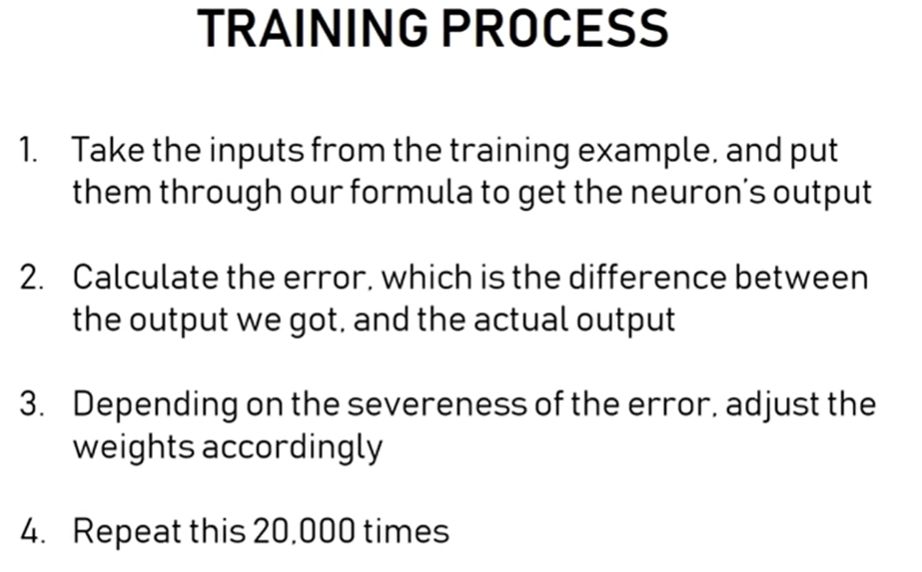 -->

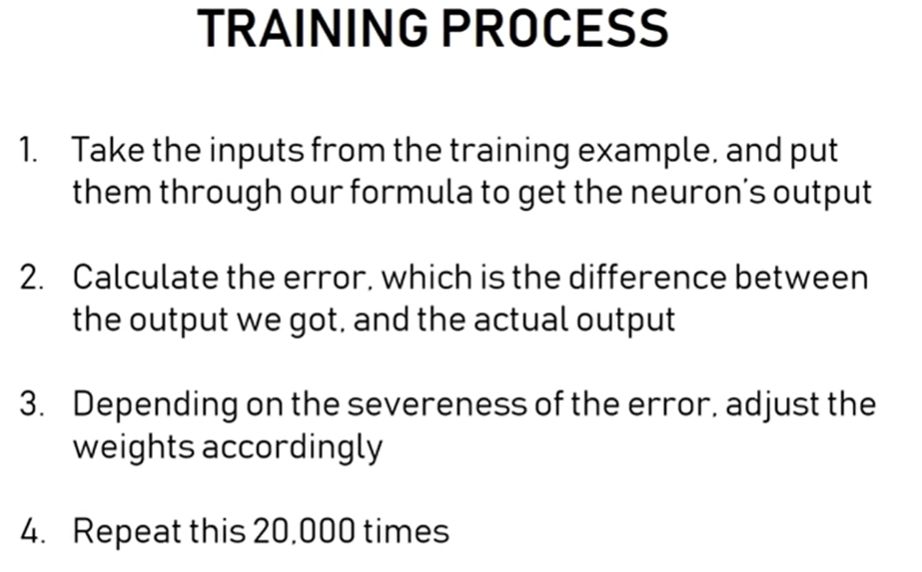

<!-- 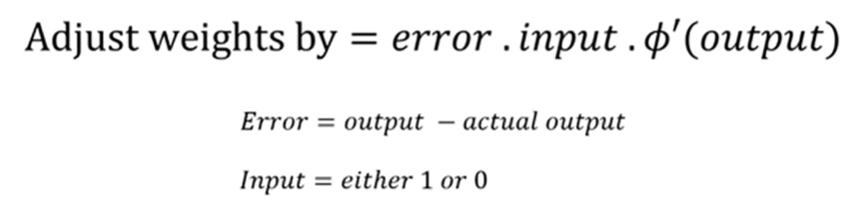 -->

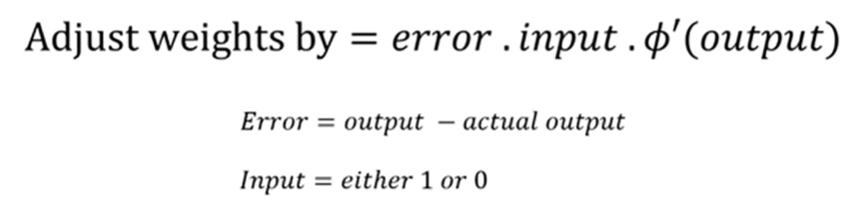

<!-- 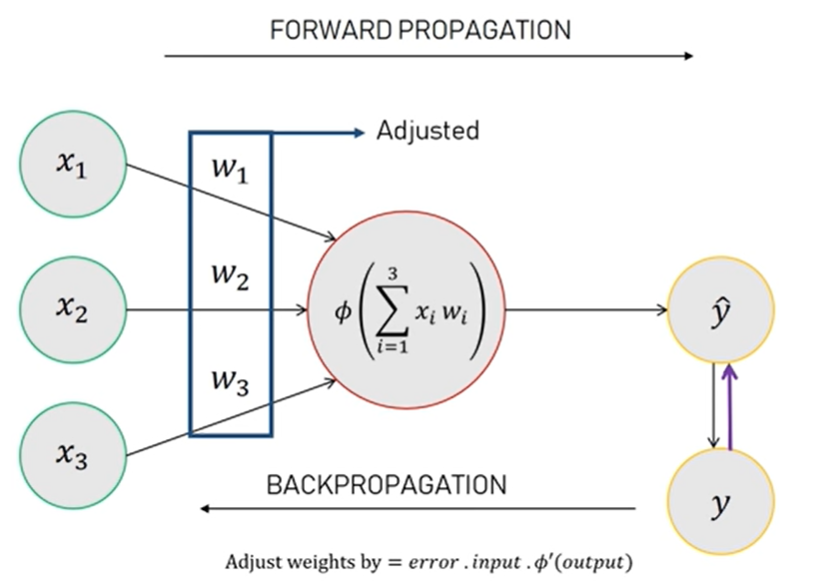 -->

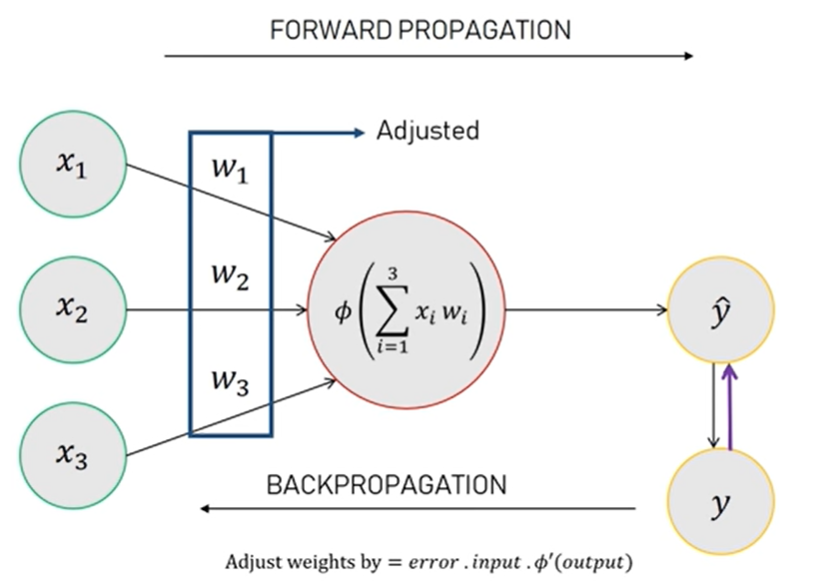

In [2]:
# First let's create the function that calculate the derivative of the sigmoid function
# ... we will learn more on how to take derivatives what they represent in the lecture on math
def sigm_derivative(x):
    return x * (1 - x)

Let's not rewrite the training loop, so that it would actually adjust the weights based on the error.

In [6]:
# training loop
for iteration in range(2):
    predictions = sigmoid(np.dot(X_train, weights_for_synapses)) # calculate the prediction (forward propagation) 
    error = y_train - predictions # calculate the error
    adjustments = error * sigm_derivative(predictions) # backprop1 
    
#     print(predictions, end="\n\n")
#     print(sigm_derivative(predictions), end="\n\n")
#     print(weights_for_synapses, end="\n\n")
#     weights_for_synapses += np.dot(X_train.T, adjustments) # backprop2 - adjustment
    weights_for_synapses += np.dot(X_train.T, adjustments) # backprop2
#     print(weights_for_synapses, end="\n\n")

Let's print the synaptic weights after.

In [14]:
print("Weights of synapses")
print(weights_for_synapses)

Weights of synapses
[[ 0.12025406]
 [ 0.50456196]
 [-0.85063774]]


And the outputs after training

In [15]:
print(predictions) # [0,1,1,0]

[[0.2689864 ]
 [0.3262757 ]
 [0.23762817]
 [0.36375058]]


Seems to be pretty similar and not correct? What happened?

If you guessed that we did not train for long enough - you guessed it.

In [9]:
# training loop
for iteration in range(10000):
    predictions = sigmoid(np.dot(X_train, weights_for_synapses)) 
    error = y_train - predictions
    adjustments = error * sigm_derivative(predictions)
    weights_for_synapses += np.dot(X_train.T, adjustments)
    
print("Weights of synapses")
print(weights_for_synapses)

print(predictions) # Expected: [0,1,1,0]

Weights of synapses
[[12.75534063]
 [-0.20389065]
 [-6.17401716]]
[[0.00207853]
 [0.9983034 ]
 [0.9986159 ]
 [0.0016958 ]]


## Explaining the weight adjustment step

<!-- 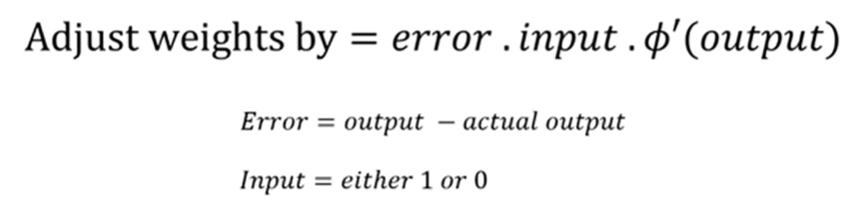 -->
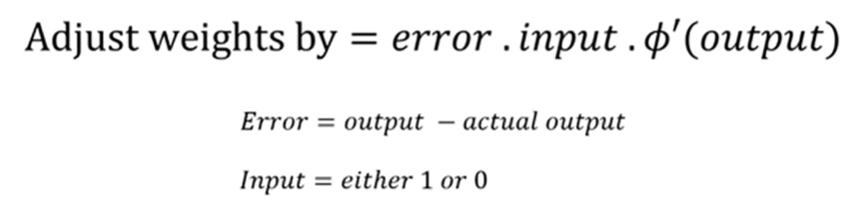

We uses a formula that adjusts the weights based on:
- size of error
- the derivative of output - "confidence" and direction
- the input that is responsible for part of error

Size of error. This one is probably clear - we subtract the expected result obtained from the (human) labeled dataset from the predicted result by our network. This is a simple error function we can use. And why do we multiply? That is because the adjustment has to depend on the error - if the error is small then the adjustment will be small, if the error is big, then the adjustment will be big.

Confidence. If the neuron outputs large negative or possitive values - it's confident, hence we don't want to adjust it's weights too much. If it's not confident (output is close to 0) then we want to adjust it more.

But why do we need the adjustments to depend on the input value (in our case 0 or 1)? This one is a bit harder to explain. We will do it in two steps:

1. Empirically - I will simply show that not multiplying by inputs makes the network never converge.
2. Mathematically - this involves the derivation of the Delta rule (https://en.wikipedia.org/wiki/Delta_rule) . We'll try to include the mathematical explanation and intuition in the lecture on mathematics. 

Additional resources to read on the 2nd: 
- https://stackoverflow.com/questions/34477827/intuition-for-perceptron-weight-update-rule 
- https://lucidar.me/en/neural-networks/learning-rule-demonstration/
- https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975
- https://page.mi.fu-berlin.de/rojas/neural/neuron.pdf
- http://hagan.okstate.edu/4_Perceptron.pdf
- https://stats.stackexchange.com/questions/411212/how-are-the-weights-updated-in-the-perceptron-learning-rule
- https://stackoverflow.com/questions/50435809/perceptron-training-rule-why-multiply-by-x
- https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

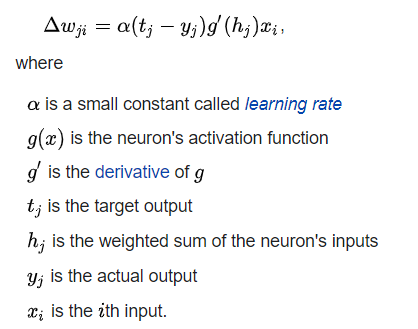

... now let's explain it empyrically. Observe that the shape of the `adjustments` variable does not allow us to add them to the `weights_for_synapses`. So we multiply them by a matrix of ones (or we could just reshape them). We will see that no matter how many iterations we perform the network does not converge.

In [40]:
# initialize random weights
weights_for_synapses = 2 * np.random.random((3, 1)) - 1 
# print(2 * np.random.random((3, 1)) - 1)

# training loop
for iteration in range(9000):
    predictions = sigmoid(np.dot(X_train, weights_for_synapses)) 
    error = y_train - predictions
    adjustments = error * sigm_derivative(predictions)
    weights_for_synapses += np.dot(X_train.T, adjustments)
#     weights_for_synapses += np.dot(np.ones(4), adjustments)
    
print("Weights of synapses")
print(weights_for_synapses)

print(predictions) # Expected: [0,1,1,0]

Weights of synapses
[[ 9.56438669]
 [-0.20899914]
 [-4.57458354]]
[[0.01020595]
 [0.99168007]
 [0.99323864]
 [0.00829703]]


## Let's see if we can train our model to work on new datasets with a different pattern

### Don't forget to restart the notebook, since we will be using the same variable names

In [19]:
import numpy as np

# helper functions
def sigmoid(input):
    return 1 / (1 + np.exp(-input))

def sigm_derivative(x):
    return x * (1 - x)

# define training inputs
X_train = np.array([[0,0,1],
                    [1,1,1],
                    [1,0,1],
                    [0,1,1]])

# Old: y_train = np.array([[0,1,1,0]]).T 
# define training outputs
# now the pattern is based not on the first, but on the second collumn
y_train = np.array([[0,1,0,1]]).T

# random synaptic weights
weights_for_synapses = 2 * np.random.random((3, 1)) - 1 

# training loop
for iteration in range(300):
    predictions = sigmoid(np.dot(X_train, weights_for_synapses)) 
    error = y_train - predictions
    adjustments = error * sigm_derivative(predictions)
    weights_for_synapses += np.dot(X_train.T, adjustments)
    
print("Weights of synapses")
print(weights_for_synapses)

print(predictions)

Weights of synapses
[[-0.22662176]
 [ 5.91706356]
 [-2.73425353]]
[[0.06109427]
 [0.95046467]
 [0.04931574]
 [0.9601094 ]]


### Questions we could ask further:
1. How can we reuse the model to make predictions on new data?
- How small can I make training loop for it to be >95% certain?
- What would happen if I used different activation functions? (will it be faster in each iteration? Will it require fewer iterations?)
- How can I measure the time it takes to train this model? (microbenchmarking)
- Would the time it takes to train the model increase significatly if I changed the activation function (and hence it's derivative)?
- The data is not very meaningfull to us. Could you come up with a scenario where the table of data we had could represent something in the real world?
- <font style="color:red">Any other questions you can think off?</font>
- Will it work on other values than 0 and 1?
- Would binary step function work even better with this example, as it should predict values ideally?

## 1 .Reusing the model to make predictions on new data

First, let's ask ourselves - there does the prediction happen, which part of the code? The key function is this:

In [7]:
predictions = sigmoid(np.dot(X_train, weights_for_synapses))

Let's try it on new data:

In [41]:
# define training inputs
X_train_new = np.array([[1,0,1]]) # change the numbers, see if the network identified the logic
predictions = sigmoid(np.dot(X_train_new, weights_for_synapses)) 
print(predictions)

[[0.99323902]]


So what does that tell us? It tells us what two essential parts comprising the entire neural network are:
- The sceleton / the architecture
- The weights obtained durring training (remain fixed after we traing the network (in traditional architectures))

### If I have the weights, I can just take the code <code>sigmoid(np.dot(X_train_new, weights_for_synapses))</code>  and reuse the model

Why is this important? Because when we'll build a end-2-end application for deep learning we will use this knowledge. We will simply transfer the trained weights into another environment that contains the model with same architecture.

## 3. Experimenting with other activation functions 

In [25]:
import numpy as np

def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def tanh_derivative(x):
    return 1-x**2

X_train = np.array([[0,0,1],
                    [1,1,1],
                    [1,0,1],
                    [0,1,1]])

y_train = np.array([[0,1,1,0]]).T
np.random.seed(5)
weights_for_synapses = 2 * np.random.random((3, 1)) - 1

print("Weights of synapses")
print(weights_for_synapses)

# training loop
for iteration in range(300):
    predictions = tanh(np.dot(X_train, weights_for_synapses)) 
    error = y_train - predictions
    adjustments = error * tanh_derivative(predictions)
    weights_for_synapses += np.dot(X_train.T, adjustments)
    
print("Weights of synapses")
print(weights_for_synapses)

print(predictions) # [0,1,1,0]

Weights of synapses
[[-0.55601366]
 [ 0.74146461]
 [-0.58656169]]
Weights of synapses
[[2.70951758]
 [0.18477801]
 [0.32502783]]
[[-0.31320288]
 [ 0.97585834]
 [ 0.98313877]
 [-0.46634753]]


Why do we say that tanh() is better than sigmoid() if the values are actually going below zero (so not 0 as we want to predict)?

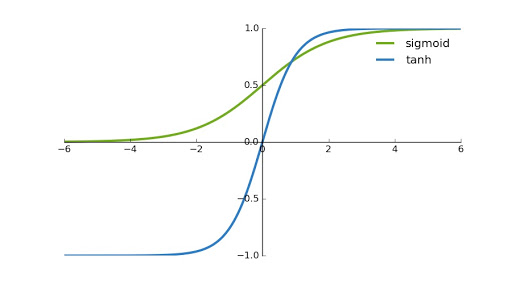

In [8]:
import numpy as np

# define the activation function
def relu(x):
    return x * (x > 0)

def relu_derivative(x):
    return 1. * (x > 0)

# define the normalizing function (used for constraining the output to a range (0, 1))
def softmax(z):
    expz = np.exp(z - np.max(z))
    return expz / expz.sum(axis=0, keepdims=True)

X_train = np.array([[0,0,1],
                    [1,1,1],
                    [1,0,1],
                    [0,1,1]])

y_train = np.array([[0,1,1,0]]).T
np.random.seed(5)
weights_for_synapses = 2 * np.random.random((3, 1))

# print("Weights of synapses")
# print(weights_for_synapses)

# training loop
for iteration in range(2000):
    interm = relu(np.dot(X_train, weights_for_synapses))
    predictions = softmax(interm)
    error = (y_train - predictions)
    adjustments = error * relu_derivative(predictions)
    weights_for_synapses += np.dot(X_train.T, adjustments)
    
print("Weights of synapses")
print(weights_for_synapses)

# TODO :: force unscientific notation
print(predictions) # [0,1,1,0] ... 4.00883733e-02 --- 0.0040088

Weights of synapses
[[2001.04892878]
 [   7.6022605 ]
 [2000.41343831]]
[[0.00000000e+00]
 [9.99500679e-01]
 [4.99321380e-04]
 [0.00000000e+00]]


## 6. Making the data more meaningful.

You will encounter some scenarios / demos on the internet that will not have much meaning to you. Try to make it meaningful. Think about the field that you know about most (whether it is computer gaming, economics, chemistry, ecommerce, law, philosophy) and come up with a scenario where the data would be used in a meaningful way. What would the data in this table represent?

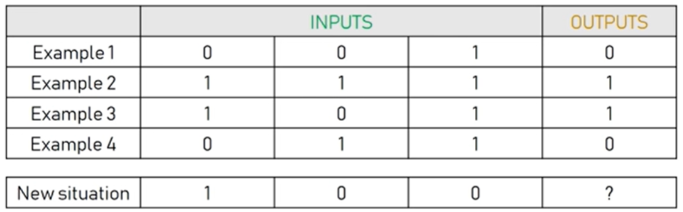

#### 1. Data about criminals and who has commited the crime. 

Example 1 is Jonas, the first field answers the question: does he know Fat Tony, the second - if he has a job, the third - if his height is more than 180cm. Same for Example 2: Petras, etc. And the outputs say if he has a criminal record in the database.

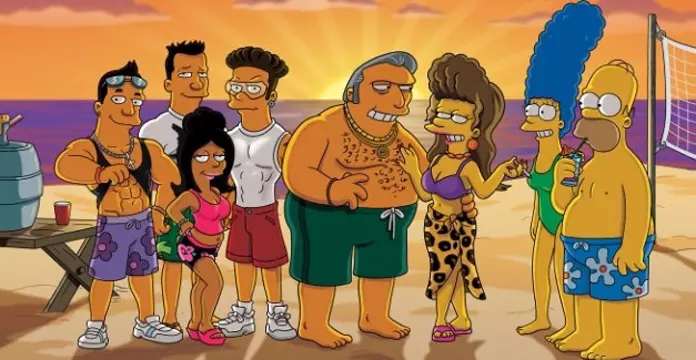

#### 2. anything else you can think of?

## ... other questions are left to answer for the curious reader as homework.